# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style='whitegrid')

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
print(train.shape)
test.shape

(381109, 12)


(127037, 11)

In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


### Null values

Data does not have any null values, thus there wont be any need for imputing or dropping data.

In [7]:
print(train.info())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (t

In [8]:
numerical_columns = test.select_dtypes(exclude=['object'])
numerical_columns

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,25,1,11.0,1,35786.0,152.0,53
1,381111,40,1,28.0,0,33762.0,7.0,111
2,381112,47,1,28.0,0,40050.0,124.0,199
3,381113,24,1,27.0,1,37356.0,152.0,187
4,381114,27,1,28.0,1,59097.0,152.0,297
...,...,...,...,...,...,...,...,...
127032,508142,26,1,37.0,1,30867.0,152.0,56
127033,508143,38,1,28.0,0,28700.0,122.0,165
127034,508144,21,1,46.0,1,29802.0,152.0,74
127035,508145,71,1,28.0,1,62875.0,26.0,265


### Numerical Columns

`id`,`Driving_License`,'`Region_Code`,`Previously_Insured`,`Policy_Sales_Channel` contain numerical values but should be treated as categorical variables in the analysis due to their categorical nature and impact.

In [9]:
numerical_columns = numerical_columns.loc[:,['Age','Annual_Premium','Vintage']].columns.to_list()
numerical_columns

['Age', 'Annual_Premium', 'Vintage']

In [10]:
categorical_columns = test.columns.difference(numerical_columns).drop('id').to_list()
categorical_columns

['Driving_License',
 'Gender',
 'Policy_Sales_Channel',
 'Previously_Insured',
 'Region_Code',
 'Vehicle_Age',
 'Vehicle_Damage']

In [11]:
train[numerical_columns].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


### Notes on descriptive stats of numerical columns

- The `Annual_Premium` can go as low as **2630** to **540,165** where the mean is **30,564**. Can assume the data is right-skewed. In other words,<font color='orange'> there are more paying lower premium than higher premium.</font>
- `Vintage` (number of days customer has been associated with the company) is all under a year (365 days), with the mean being at 154 days roughly half a year.

## Target Variable (Response)

In [12]:
train.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

### Age distribution of Customers

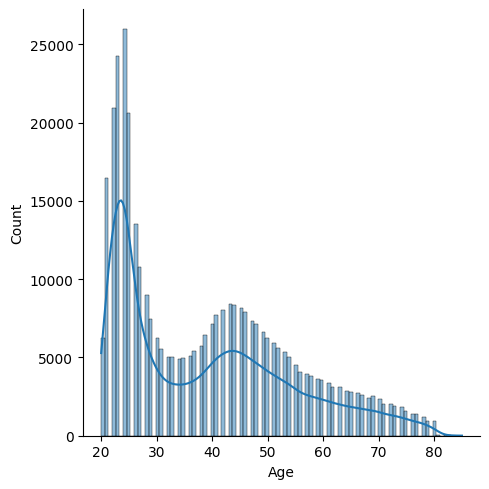

In [13]:
sns.displot(train.Age,kde=True)
plt.show()

#### Observations
- The `Age` variable appears to have a **bimodal distribution** with the primary peak being in the age range of 24-25 and second peak at 45-50.

### Age & Annual Premium

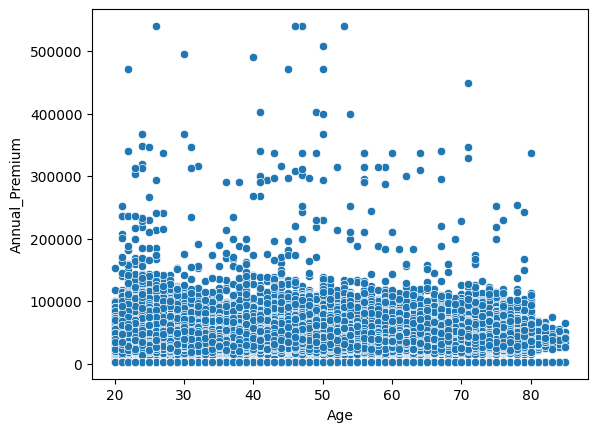

In [14]:
sns.scatterplot(x=train.Age,y=train.Annual_Premium)
plt.show()

#### Observations

- Weak or no correlation between these variables
- However large majority of observations of Premiums paid are under 100,000 - 120,000 , regardless of age


### Gender & Response 

In [19]:
temp = train.groupby(['Response','Gender'])['id'].count().to_frame().reset_index().rename(columns={'id':'count'})

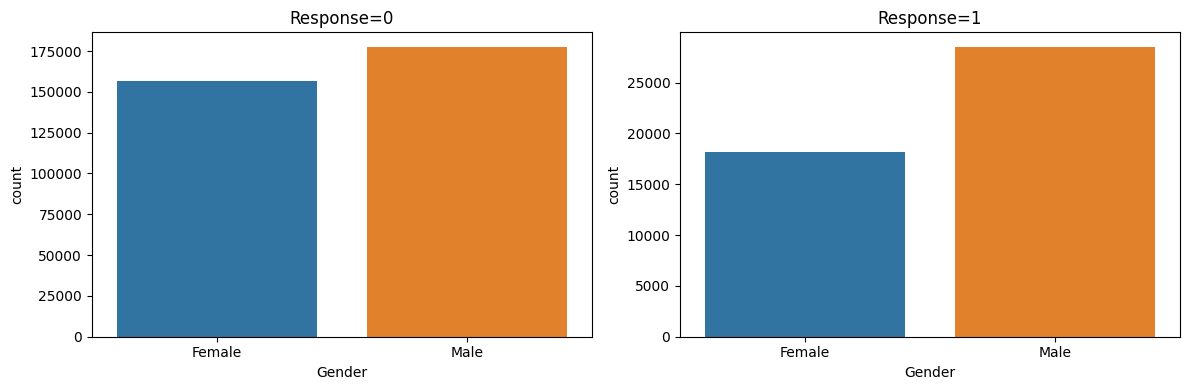

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x="Gender",y="count",hue="Gender",data=temp.query("Response == 0"),ax=ax1)
sns.barplot(x="Gender",y="count",hue="Gender",data=temp.query("Response == 1"),ax=ax2)

ax1.set_title("Response=0")
ax2.set_title("Response=1")

plt.tight_layout()
plt.show()

#### Observations

- There are in total more Male in the sample than Female
- Male have a higher percentage of "Interested" in Vehicle Insurance than Female

### Damage Vehicle & Response

In [26]:
temp = train.groupby(['Response','Vehicle_Damage'])['id'].count().to_frame().reset_index().rename(columns={'id':'count'})

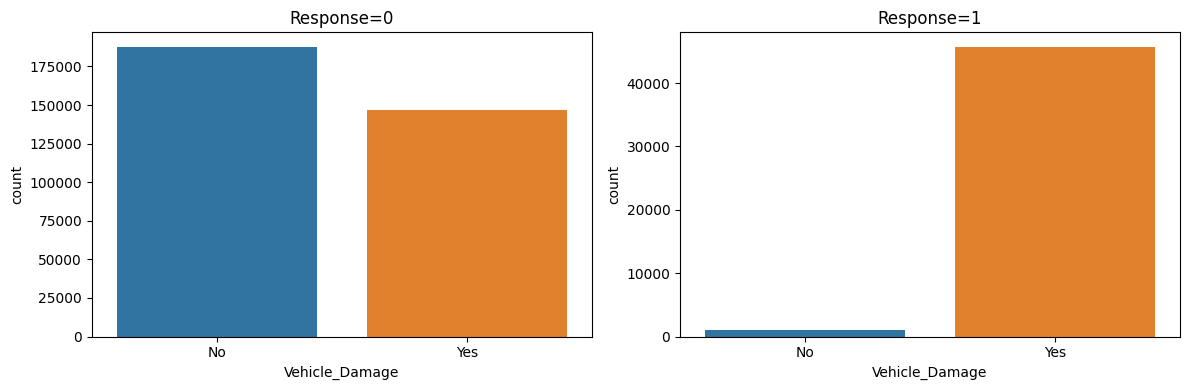

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x="Vehicle_Damage",y="count",hue="Vehicle_Damage",data=temp.query("Response == 0"),ax=ax1)
sns.barplot(x="Vehicle_Damage",y="count",hue="Vehicle_Damage",data=temp.query("Response == 1"),ax=ax2)

ax1.set_title("Response=0")
ax2.set_title("Response=1")

plt.tight_layout()
plt.show()

#### Observations

- Overwhelming response of those who have been through any vehicle damage have been keen on getting vehicle insurance.

In [49]:
temp = train.groupby(['Response','Vehicle_Age'])['id'].count().to_frame().reset_index().rename(columns={'id':'count'})
vehicle_age_order = ['< 1 Year', '1-2 Year', '> 2 Years']
temp['Vehicle_Age'] = pd.Categorical(temp['Vehicle_Age'], categories=vehicle_age_order, ordered=True)
temp = temp.sort_values(['Response', 'Vehicle_Age'])

temp

,Response,Vehicle_Age,count
1,0,< 1 Year,157584
0,0,1-2 Year,165510
2,0,> 2 Years,11305
4,1,< 1 Year,7202
3,1,1-2 Year,34806
5,1,> 2 Years,4702


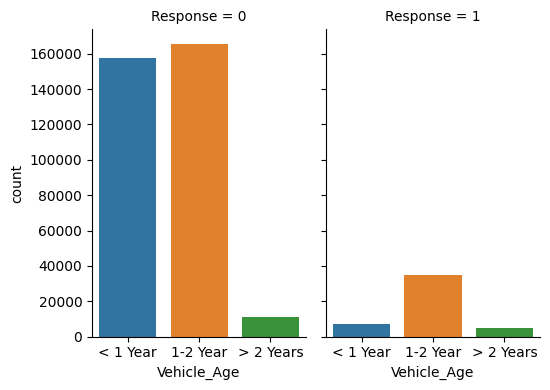

In [54]:
sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=temp, kind="bar", hue="Vehicle_Age",
                height=4, aspect=.7);

#### Observations

- For responders (Response=1), there's a strong preference towards vehicles that are 1-2 years old, followed by those less than 1 year old. Vehicles older than 2 years are the least common in both groups.
- There seems to be a correlation between vehicle age and likelihood of response, with owners of 1-2 year old vehicles being more likely to respond positively to insurance offers.
- Cars that are > 2 Years represent the least of the sample size, however they are more likely to buy insurance.

### Distribution of Annual Premium

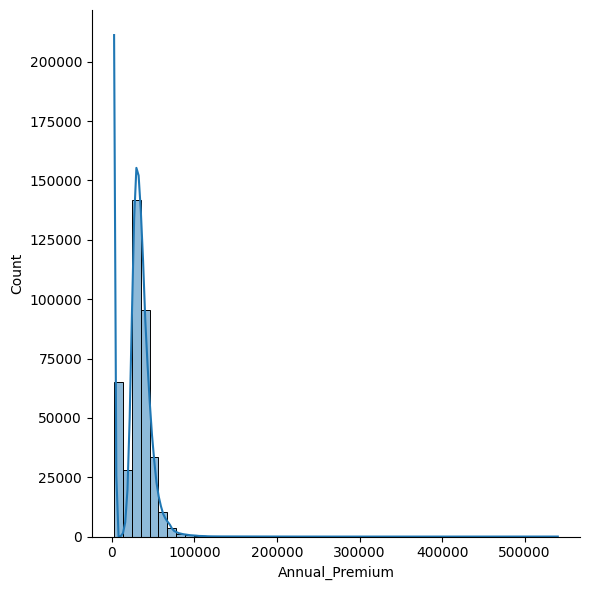

In [44]:
sns.displot(train.Annual_Premium,height=6,bins=50,kde=True)
plt.show()

#### Observations

- Majority of all Annual Premiums are all on the lower end roughly around 50,000 and lower, even though there are some premiums that can go up to 500,000 indicating more inclination (less probability) to spend more money on insurance.

## Pre-Processing Data

Lets create some features to assist with processing the data for the model we will be creating.